## *Seminar 5: Local volatility model*

## 1. Dupire formula

#### 1.1 Dupire equation

Under the risk-neutral measure $\mathbb{Q}$, the stock price diffuses according to equation

$$dS_t = \mu_t S_t dt +  \sigma(t, S_t) S_t dW_t,$$

where $\mu_t$ is a risk-neutral drift (effectively equal to $r_t - q_t$, where $r_t$ and $q_t$ are non-random instanteneous interest rate and dividend yield correspondingly).  

Then if $\{ C(T, K; S_0) \}_{T, K}$ represent a continum of observable on the market **undiscounted** option prices, the model is calibrated to the market if and only if $\sigma(t, x)$ satisfies the **Dupire equation**:

$$\dfrac{\partial C}{\partial T} = \dfrac{\sigma^2(T, K)}{2} K^2 \dfrac{\partial^2 C}{\partial K^2} + \mu_T (C - K \dfrac{\partial C}{\partial K})$$

In practice, instead of spot $S_t$ we are faced with the forward $F_t$, that is the model is given by the equation 

$$dF_t = \tilde \sigma(t, F_t) F_t dW_t,$$

where $F_t = S_t \exp \{ {\int_{t}^{T} \mu_t dt \} }$ and the Dupire equation transforms to 

$$\dfrac{\partial C}{\partial T} = \dfrac{\tilde \sigma^2(T, K)}{2} K^2 \dfrac{\partial^2  C}{\partial K^2},$$

where $\tilde \sigma$ is short for $\sigma(t, x) := \tilde \sigma(t, x \exp \{ - {\int_{t}^{T} \mu_t dt \} }).$


#### 1.2 Dupire formula

The local volatility function $\sigma(t, x)$ (or $\tilde \sigma(t, x)$ respectively) can be obtained from the formulas

$$\sigma(T, K) = \sqrt{\dfrac{\dfrac{\partial C}{\partial T} + \mu_T \left( C - K \dfrac{\partial C}{\partial K} \right) }{\dfrac{K^2}{2} \dfrac{\partial^2 C}{\partial K^2}}}$$

or 

$$\tilde \sigma(T, K) = \sqrt{\dfrac{\dfrac{\partial C}{\partial T}}{\dfrac{K^2}{2} \dfrac{\partial^2 C}{\partial K^2}}}.$$

#### 1.3 The naive LV model construction

1. Collect the data, consisting of a matrix of quoted option prices $\{C(T_i, K_j) \}_{i, j}$, where $i = \{ 1, . . . , N \}, j = \{ 1, . . . , M(i)\}$,  together with the yield curve (to determine $r_t$) and dividend yield (to determine $q_t$).

2. Interpolate and extrapolate these prices to produce a smooth surface of prices $C$.

3. Calculate $\tilde \sigma(T, F)$  (and/or the corresponding $ \sigma(T, S)$). 

4. Price exotic derivatives within finite-difference or Monte Carlo methods under calibrated local vlatility model.

Potential difficulties and disadvantages of such approach: 

1. A real market will only have a finite number of (liquid) option prices $\Rightarrow$ need an inter-and-extrapolation of option prices. 

2. Unsophisticated inter-and-extrapolation may lead to a calendar arbitrage (i.e. $\frac{\partial C}{\partial T} + \mu_T \left( C - K \frac{\partial C}{\partial K} \right) < 0$) or strike arbitrage (i.e. $\frac{\partial^2 C}{\partial K^2} < 0$) $\Rightarrow$ need a sophisticated inter-and-extrapolation technique.

3. Even if the conditions (1) and (2) are met, finding local volatility this way is
dangerous and unstable, as for OTM options the derivatives may become too small which leads to the division of one very small number to the other, and, hence, to unstable calculations $\Rightarrow$ move to work with $\sigma_{IV}(T, K)$ instead of $C(T, K)$.

#### 1.4. Local Volatility in Terms of Implied Volatility

Market prices of options are quoted in terms of Black-Scholes implied volatility $\sigma_{IV}(T, K)$. In other words, we may write

$$C(T, K) = C_{BS}(T, K, \sigma_{IV}(T, K)).$$

Introduce two new variables: 

1. The Black-Scholes implied total variance $w$, defined by 

$$w(K, T) = \sigma^{2}_{IV}(K, T) \cdot T.$$

2. Log-moneyness $y$, defined by

$$y = \log(K / F_T).$$

Now, the Black-Scholes formula (for an **undiscounted** price) becomes

$$C_{BS}(y, w) = F_T \left \{ N_{0, 1}\left( \frac{-y}{\sqrt{w}} + \frac{\sqrt{w}}{2} \right) - e^{y} N_{0, 1}\left( \frac{-y}{\sqrt{w}} - \frac{\sqrt{w}}{2} \right) \right \},$$

and the Dupire equation (for a spot dynamics) becomes 

$$\dfrac{\partial C}{\partial T} = \dfrac{v_L}{2} \left \{ \dfrac{\partial^2 C}{\partial y^2} - \dfrac{\partial C}{\partial y}\right \} + \mu_T C, $$

where $v_L = \sigma^2 (T, K)$ represents the local variance.

Now, by taking the derivatives of the Black-Scholes formula, we obtain

$$\dfrac{\partial^2 C_{BS}}{\partial \omega^2} = \left( - \frac{1}{8} - \dfrac{1}{2w} + \frac{y^2}{2w^2} \right) \dfrac{\partial C_{BS}}{\partial w},$$
$$\dfrac{\partial^2 C_{BS}}{\partial y \partial w} = \left( \frac{1}{2} - \frac{y}{w}\right) \dfrac{\partial C_{BS}}{\partial w},$$
$$\dfrac{\partial^2 C_{BS}}{\partial y^2} = \dfrac{\partial C_{BS}}{\partial y} + 2 \dfrac{\partial C_{BS}}{\partial w}.$$

At the same time, 

$$\dfrac{\partial C}{\partial y} = \dfrac{\partial C_{BS}}{\partial y} + \dfrac{\partial C}{\partial w} \dfrac{\partial w}{\partial y},$$
$$\dfrac{\partial^2 C}{\partial y^2} = \dfrac{\partial^2 C_{BS}}{\partial y^2} + 2 \dfrac{\partial^2 C}{\partial w \partial y} \dfrac{\partial w}{\partial y} + \dfrac{\partial^2 C_{BS}}{\partial w^2} \left( \dfrac{\partial w}{\partial y}^2 \right) + \dfrac{\partial C_{BS}}{\partial w} \dfrac{\partial^2 w}{\partial y^2},$$
$$\dfrac{\partial C}{\partial T} = \dfrac{\partial C_{BS}}{\partial T} + \dfrac{\partial C_{BS}}{\partial w} \dfrac{\partial w}{\partial T} = \mu_T C_{BS} + \dfrac{\partial C_{BS}}{\partial w} \dfrac{\partial w}{\partial T}.$$

Hence, 

$$\dfrac{\partial C_{BS}}{\partial w} \dfrac{\partial w}{\partial T} = \dfrac{v_L}{2}
\left \{ - \dfrac{\partial C_{BS}}{\partial y} + \dfrac{\partial^2 C_{BS}}{\partial y^2} - \dfrac{C_{BS}}{\partial w} \dfrac{\partial w}{\partial y} + 2 \dfrac{\partial^2 C}{\partial w \partial y} \dfrac{\partial w}{\partial y} + \dfrac{\partial^2 C_{BS}}{\partial w^2} \left( \dfrac{\partial w}{\partial y}^2 \right) + \dfrac{\partial C_{BS}}{\partial w} \dfrac{\partial^2 w}{\partial y^2}\right \} = $$
$$= \dfrac{v_L}{2} \dfrac{\partial C_{BS}}{\partial w} 
\left \{ 2 - \dfrac{\partial w}{\partial y} + 2 \left( \dfrac{1}{2} - \frac{y}{w} \right) \dfrac{\partial w}{\partial y} + \left( -\dfrac{1}{8} - \dfrac{1}{2 w} + \dfrac{y^2}{2w^2} \right) \left( \dfrac{\partial w}{\partial y}\right)^2 + \dfrac{\partial^2 w}{\partial y^2} \right \} $$

Thus, we get 

$$v_L = \dfrac{\dfrac{\partial w}{\partial T}}{1 - \dfrac{y}{w} \dfrac{\partial w}{\partial y} + \dfrac{1}{4} ( -\dfrac{1}{4} - \dfrac{1}{w} + \dfrac{y^2}{w^2}) (\dfrac{\partial w}{\partial y})^2 + \dfrac{1}{2} \dfrac{\partial^2 w}{\partial y^2}}. $$

Finally, 

$$ \sigma (T, K) = \sqrt{\dfrac{\frac{\partial w}{\partial T}}{1 - \dfrac{y}{w} \dfrac{\partial w}{\partial y} + \dfrac{1}{4} ( -\dfrac{1}{4} - \dfrac{1}{w} + \dfrac{y^2}{w^2}) (\dfrac{\partial w}{\partial y})^2 + \dfrac{1}{2} \dfrac{\partial^2 w}{\partial y^2}}}.$$

#### 1.5. Example of Local Volatility Calibration

In [46]:
import json
import matplotlib.pyplot as plt
import numpy as np
from typing import Union, Callable
from scipy.interpolate import interp1d, RectBivariateSpline
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [47]:
number_of_years = 2
number_of_days_per_year = 252 # BUS252 convention
number_of_days_per_month = 21
pillar_indices = [1, 2, 3, 6, 9, 12, 18, 24] 
maturities = np.array([indice * number_of_days_per_month / number_of_days_per_year for indice in pillar_indices])
strikes = np.linspace(0.5, 1.5, 30)

In [48]:
f = open('options_data.json')
data = json.load(f)

In [49]:
spot = data["S0"]
interest_rate = data["r"]
implied_vols = data["IV"]
# assume dividend rate q_t equal to 0 and constant interest rate r_t

In [50]:
implied_vols

{'0.08333333333333333': {'iv': [0.16520152348420222,
   0.1592859989696469,
   0.15427468943100503,
   0.15070038442278538,
   0.14896601097521625,
   0.14900508531390755],
  'strikes': [0.9285714285714286,
   0.9591836734693877,
   0.9897959183673469,
   1.0204081632653061,
   1.0510204081632653,
   1.0816326530612246]},
 '0.16666666666666666': {'iv': [0.18011814811772758,
   0.17373370820639247,
   0.167622565755419,
   0.16199045249044583,
   0.15716884937618028,
   0.15359257930617157,
   0.1516148863556694,
   0.1512496990269938,
   0.15217432599109587,
   0.15397195851637224],
  'strikes': [0.8673469387755102,
   0.8979591836734694,
   0.9285714285714286,
   0.9591836734693877,
   0.9897959183673469,
   1.0204081632653061,
   1.0510204081632653,
   1.0816326530612246,
   1.1122448979591837,
   1.1428571428571428]},
 '0.25': {'iv': [0.18812230067393634,
   0.18185724653843627,
   0.1757677722269371,
   0.16996187766661708,
   0.1646202772292653,
   0.16001779562707932,
   0.156498

In [51]:
def forward(maturity: Union[float, np.array]):
    """
    Returns forward F_t = S_0 * e^{rT}.
        maturity (float): maturity of the forward T.
    """
    return spot * np.exp(interest_rate * maturity)

No handles with labels found to put in legend.


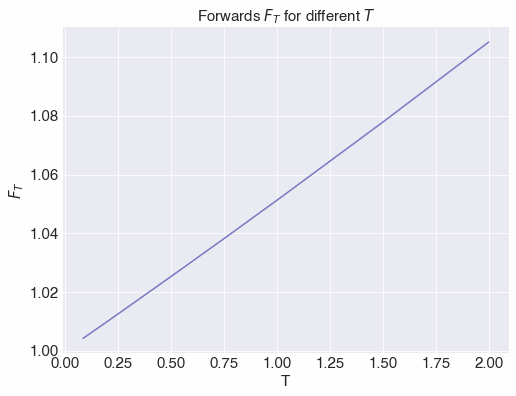

In [52]:
plt.figure(figsize=(8, 6)) 
plt.plot(maturities, forward(maturities))   
plt.title("Forwards $F_T$ for different $T$", fontsize=15)
plt.ylabel("$F_T$", fontsize=15)
plt.xlabel("T", fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.legend(prop={'size': 13})
plt.grid(True)

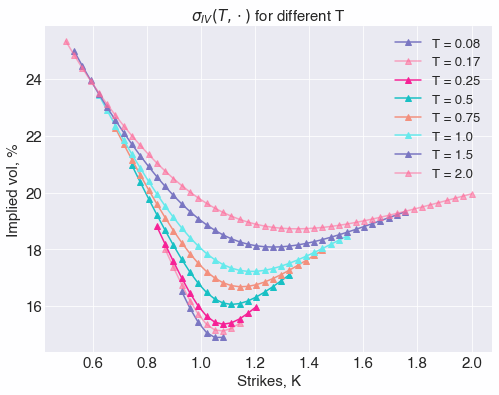

In [53]:
plt.figure(figsize=(8, 6))

for tenor, iv in implied_vols.items():
    ind = np.random.randint(100)
    strikes_ = iv["strikes"]
    implied_vols_for_tenor_ = iv["iv"]
    label="T = {}".format(round(float(tenor), 2))
    plt.plot(strikes_, 100 * np.array(implied_vols_for_tenor_), label=label, marker = "^")
    
plt.title("$\sigma_{IV}(T, \cdot)$ for different T", fontsize=15)
plt.ylabel("Implied vol, %", fontsize=15)
plt.xlabel("Strikes, K", fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.legend(prop={'size': 13})
plt.grid(True)

In [54]:
def dupire_for_appropriate_strikes(implied_vols: dict,
                                   forward: Callable[float, float],
                                   strikes: np.array):
    """
        Calculates local volatility function from IV curves for different tenors. 
            implied_vols (dict): dict of implied vol curves. 
            forward (Callable[float, float]): function returning the forward on specific tenor.
            strikes (np.array): array of strikes.
    """
    iv_2_at_k = np.empty((len(implied_vols.keys()), len(strikes)))
    iv_2_at_k[:,:] = np.nan
    time_grid = []
    for i, t in enumerate(implied_vols.keys()):
        time_to_maturity = float(t)
        time_grid.append(time_to_maturity)
        strike_t = np.array(implied_vols[t]['strikes'])
        iv_t = np.array(implied_vols[t]['iv'])

        # Interpolate the implied vol in (total variance, log forward moneyness) coordinates.
        implied_vol_surface_t_squared = interp1d(np.log(strike_t / forward(time_to_maturity)), time_to_maturity * iv_t ** 2, kind='cubic', fill_value='extrapolate')
        
        # From obtained interpolator, retrieve variances at given strikes. 
        iv_2_at_k[i,:] = implied_vol_surface_t_squared(np.log(strikes / forward(time_to_maturity))) / time_to_maturity
    
    time_grid = np.array(time_grid)

    # total variances w
    w_at_k = iv_2_at_k * np.tile(time_grid.reshape(-1, 1), (1, strikes.shape[0]))
    w_interp = RectBivariateSpline(time_grid, np.log(strikes / forward(time_to_maturity)), w_at_k, s=0.1)
    
    # partial derivatives of w 
    dw_dt = w_interp.partial_derivative(dx=1, dy=0)
    dw_dlogK = w_interp.partial_derivative(dx=0, dy=1)
    d2w_dlogK2 = w_interp.partial_derivative(dx=0, dy=2)

    local_vol_squared = lambda t, logForwMoneyness: dw_dt(t, logForwMoneyness, grid=False) / (
                    1 - logForwMoneyness / w_interp(t, logForwMoneyness, grid=False) * dw_dlogK(t, logForwMoneyness, grid=False) 
                    + 0.25 * (-0.25 - 1 / w_interp(t, logForwMoneyness, grid=False) + logForwMoneyness * logForwMoneyness / (w_interp(t, logForwMoneyness, grid=False)**2)) * dw_dlogK(t, logForwMoneyness, grid=False)**2 
                    + 0.5 * d2w_dlogK2(t, logForwMoneyness, grid=False))

    local_vol = lambda t, k: np.sqrt(local_vol_squared(t, np.log(k / forward(t))))
    return local_vol

In [55]:
local_vol = dupire_for_appropriate_strikes(implied_vols, forward, strikes)
local_vol

<function __main__.dupire_for_appropriate_strikes.<locals>.<lambda>(t, k)>

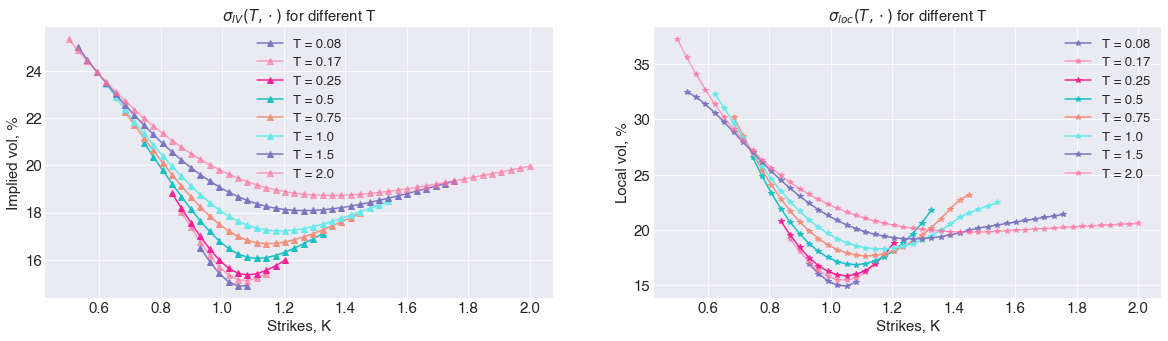

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

for tenor, iv in implied_vols.items():
    tenor = float(tenor)
    strikes = iv["strikes"]
    implied_vols_for_tenor = iv["iv"]
    label="T = {}".format(round(tenor, 2))
    ax1.plot(strikes, 100 * np.array(implied_vols_for_tenor), label=label, marker = "^")
    ax2.plot(strikes, 100 * local_vol(tenor, strikes), label=label, marker = "*")
    
    ax1.set_title("$\sigma_{IV}(T, \cdot)$ for different T", fontsize=15)
    ax1.set_ylabel("Implied vol, %", fontsize=15)
    ax1.set_xlabel("Strikes, K", fontsize=15)
    ax1.tick_params(axis='both', labelsize=15)
    ax1.legend(prop={'size': 13})
    ax1.grid(True)

    ax2.set_title("$\sigma_{loc}(T, \cdot)$ for different T", fontsize=15)
    ax2.set_ylabel("Local vol, %", fontsize=15)
    ax2.set_xlabel("Strikes, K", fontsize=15)
    ax2.tick_params(axis='both', labelsize=15)
    ax2.legend(prop={'size': 13})
    ax2.grid(True)

<u> References </u>

1. Jim, Gatheral. (2006). The Volatility Surface: A Practitioner's Guide.  

2. Berestycki, Henri, Jérôme Busca and Igor Florent. “Asymptotics and calibration of local volatility models.” *Quantitative Finance* 2 (2002): 61 - 69.

3. M. Bos and S. Vandermark. Finessing fixed dividends. *Risk*, Septermber 2002